In [ ]:
!pip install pandas-profiling

In [39]:
!pip install pycaret[full] --user

     ---------------------------------------- 56.9/56.9 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 55.5/55.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 132.7/132.7 kB 8.2 MB/s eta 0:00:00
     ------------------------------------- 348.5/348.5 kB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 64.7/64.7 kB 3.4 MB/s eta 0:00:00
     ------------------------------------- 305.7/305.7 kB 19.7 MB/s eta 0:00:00
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
     -------------------------------------- 100.3/100.3 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 92.2/92.2 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 20.9/20.9 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 177.5/177.5 kB ? eta 0:00:00
     ---------------------------------------- 41.1/41.1 kB ? eta 

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [24 lines of output]
  C:\Users\humbe\anaconda3\envs\environment\lib\site-packages\setuptools\dist.py:726: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    % (opt, underscore_opt)
  C:\Users\humbe\anaconda3\envs\environment\lib\site-packages\setuptools\installer.py:30: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
    SetuptoolsDeprecationWarning,
  Traceback (most recent call last):
    File "<string>", line 36, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\humbe\AppData\Local\Temp\pip-install-tdtb6d0i\boruta_64b087d452364cf58a906e6733d1fa13\setup.py", line 18, in <module>
      long_description_markdown_filename='README.md')
    File "C:\Users\hu

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import warnings
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from pycaret.regression import *

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Read in the data
df=pd.read_csv('pool_data_202211111622-04_500-20221101.csv', sep=',')

In [3]:
# First step, get a high level feel for your data
df

,pool_id,time_stamp,t_s Right,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,Pressure in,Pressure out,Pump RPM,pump current,dis_feeder,ph_feeder,Fresh water,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16,-400,287.18,NaN,NaN,9.51,774.05,7.42,287.18,NaN,2.54,2.53,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26,-400,287.18,NaN,NaN,9.36,773.60,7.42,287.18,NaN,2.54,2.53,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36,-400,287.12,NaN,NaN,9.36,773.87,7.42,287.12,NaN,2.54,2.53,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46,-400,287.25,NaN,NaN,8.57,773.96,7.41,287.25,NaN,2.54,2.53,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:57,-400,287.18,NaN,NaN,8.89,773.60,7.42,287.16,NaN,2.54,2.53,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39663,10001,2022-11-07 21:59:25,-500,286.05,NaN,NaN,31.27,719.62,7.60,286.05,NaN,2.52,2.51,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN
39664,10001,2022-11-07 21:59:35,-500,286.02,NaN,NaN,31.11,719.43,7.59,286.02,NaN,2.52,2.51,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN
39665,10001,2022-11-07 22:59:44,-500,285.29,NaN,NaN,31.27,717.08,7.59,285.29,NaN,2.52,2.52,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN
39666,10001,2022-11-07 22:59:54,-500,285.26,NaN,NaN,30.96,717.36,7.59,285.26,NaN,2.52,2.51,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00,74.26,500.00,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extension on first step, more descriptions of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39668 entries, 0 to 39667
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pool_id                39668 non-null  int64  
 1   time_stamp             39668 non-null  object 
 2   t_s Right              39668 non-null  int64  
 3   salinity               39637 non-null  float64
 4   flow switch            31 non-null     float64
 5   flow meter             0 non-null      float64
 6   turbidity              39637 non-null  float64
 7   ORP                    39668 non-null  float64
 8   PH                     39668 non-null  float64
 9   TDS                    39637 non-null  float64
 10  Pressure in tank       0 non-null      float64
 11  Pressure in            39637 non-null  float64
 12  Pressure out           39637 non-null  float64
 13  Pump RPM               0 non-null      float64
 14  pump current           39637 non-null  float64
 15  di

<AxesSubplot:>

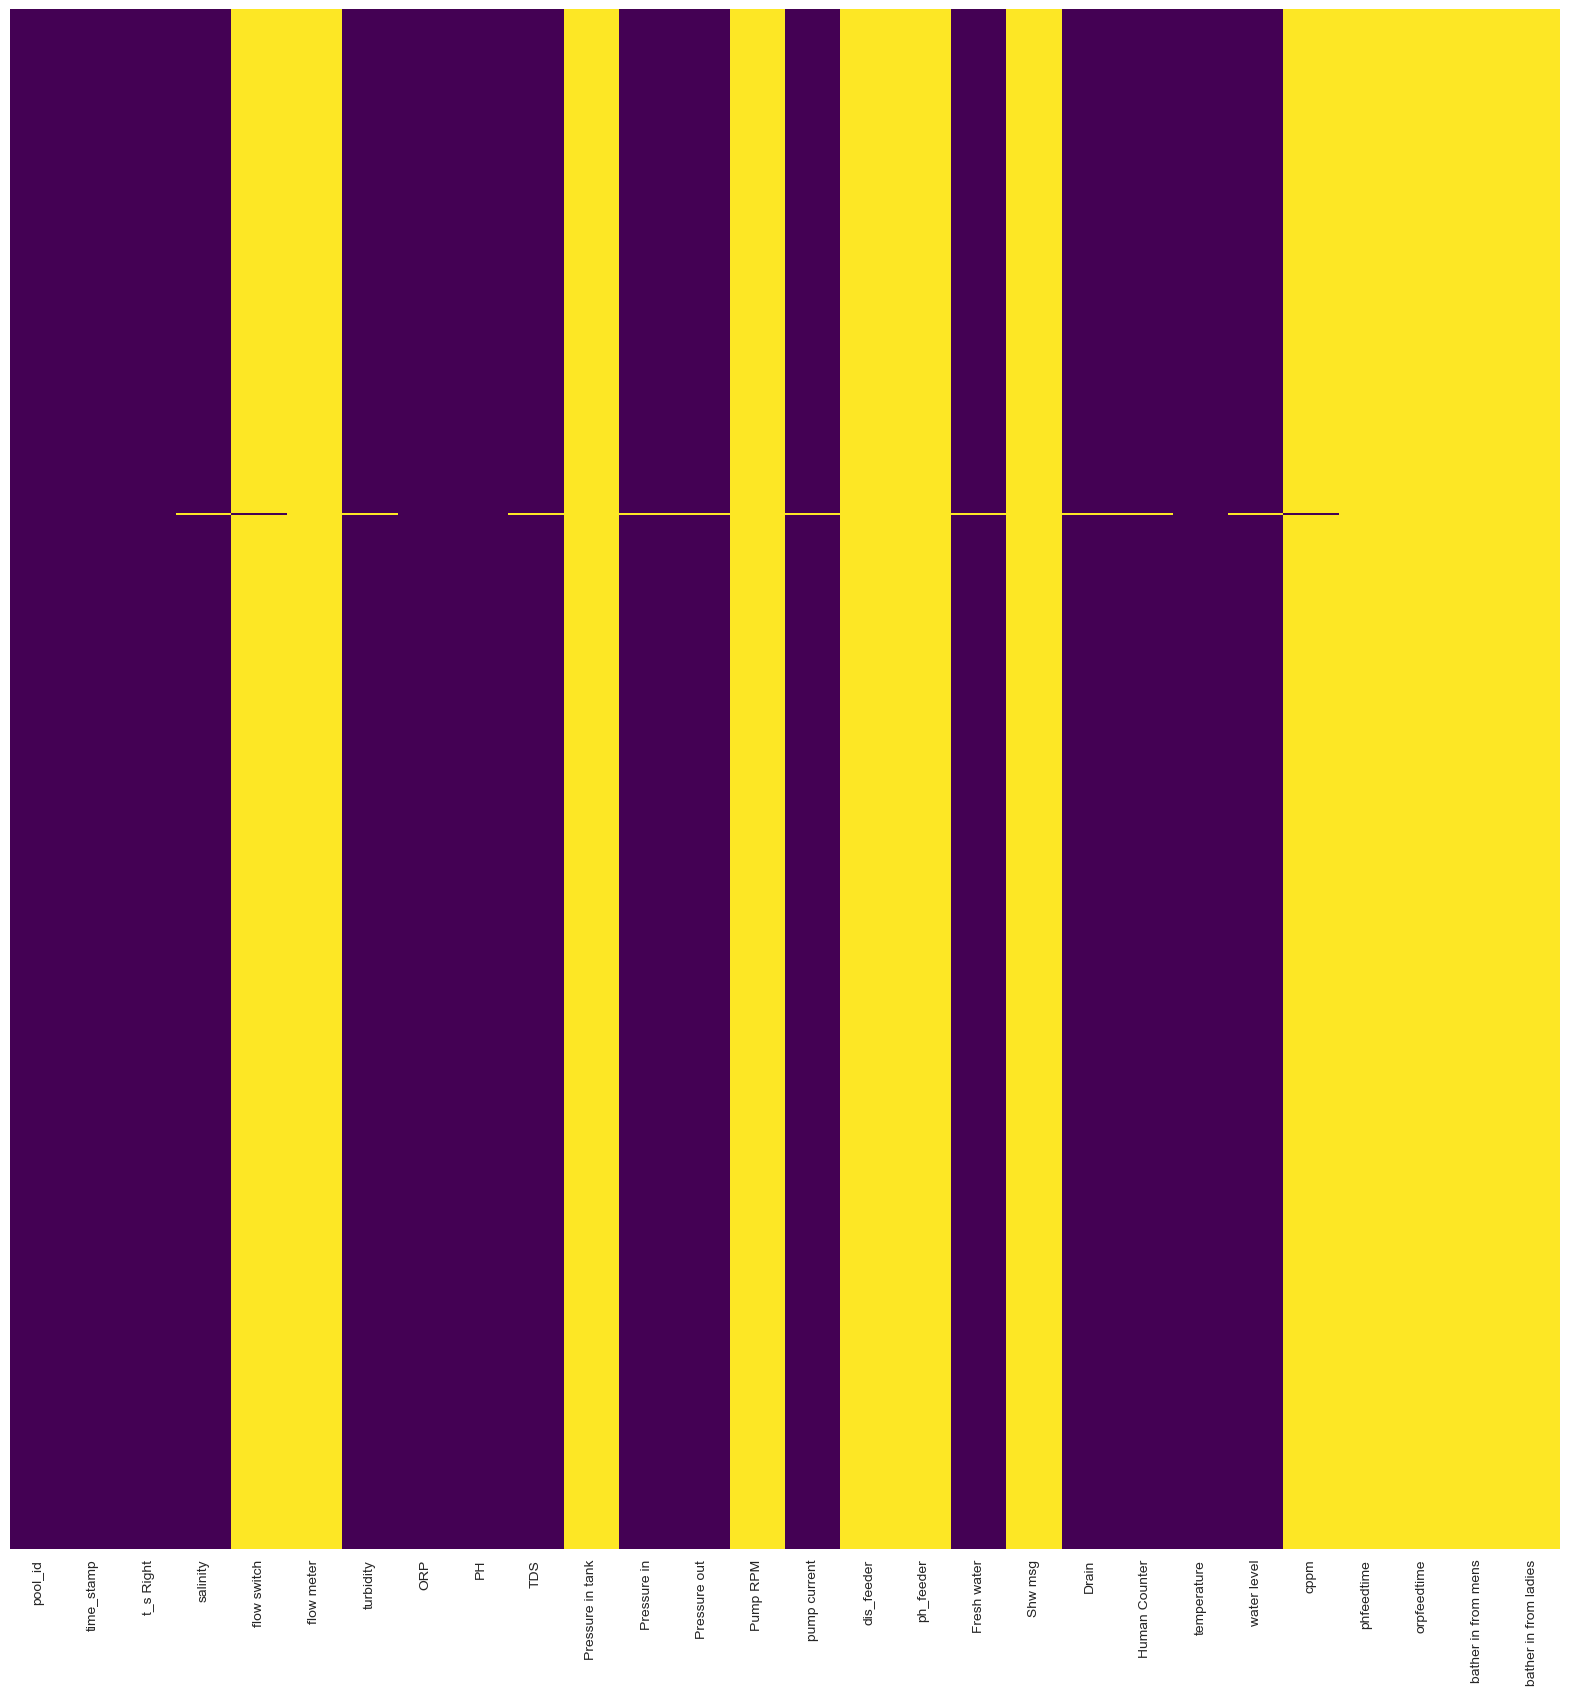

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Explanation of the terms (Source: Michael)

Non-Null Terms

pool_id: id of the pool
time_stamp: the time in which the data is recorded
salinity: the amount of salt dissolved in the water (g/kg in ppm)
turbidity: measure of relative clarity of water (NTU)
ORP: oxidation-reduction potential (mV)
pH: acidity measurement (pH)
TDS: total dissolved solid (mg/L in ppm)
Pressure in: pressure measurement near the water inlet (probably in bar)
Pressure out: pressure measurement near the water outlet (probably in bar)
Pump current:
Human Counter:
temperature: temperature in the pool (in F)
water level: level of water

Non-Null Term but are mostly 0: 31

Fresh water:
Drain:

Null Terms

flow_switch: signal indicating water flow
flow meter: the amount of water flow
pressure in tank: pressure inside the pool (probably bar)
Pump RPM: Rotation speed of pump (Rotation Per Minute)
dis_feeder
ph_feeder
Shw msg
cppm
phfeedtime
orpfeedtime
bather in from mens
bather in from ladies

CDC requirements (Source: Michael)
Maintain free chlorine levels continuously between 1–3 parts per million.
Maintain the pH level of the water at 7.2–7.8.
There are probably more requirements. But I think we can first check the pH of the pool to see if it fits the requirement.

In [6]:
df = df.drop(columns=['flow switch','flow meter', 'Pressure in tank','Pump RPM','dis_feeder','ph_feeder','Shw msg','cppm','phfeedtime','orpfeedtime','bather in from ladies','bather in from mens','Fresh water','Drain','t_s Right','pool_id'])

In [7]:
df['time_stamp']=pd.to_datetime(df['time_stamp'],format='%Y-%m-%d %H:%M:%S')

In [8]:
df.set_index('time_stamp',inplace=True)

In [9]:
# Extension on first step, more descriptions of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39668 entries, 2022-11-01 11:01:16 to 2022-11-07 23:59:54
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salinity       39637 non-null  float64
 1   turbidity      39637 non-null  float64
 2   ORP            39668 non-null  float64
 3   PH             39668 non-null  float64
 4   TDS            39637 non-null  float64
 5   Pressure in    39637 non-null  float64
 6   Pressure out   39637 non-null  float64
 7   pump current   39637 non-null  float64
 8   Human Counter  39637 non-null  float64
 9   temperature    39668 non-null  float64
 10  water level    39637 non-null  float64
dtypes: float64(11)
memory usage: 3.6 MB


In [10]:
df=df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39637 entries, 2022-11-01 11:01:16 to 2022-11-07 23:59:54
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salinity       39637 non-null  float64
 1   turbidity      39637 non-null  float64
 2   ORP            39637 non-null  float64
 3   PH             39637 non-null  float64
 4   TDS            39637 non-null  float64
 5   Pressure in    39637 non-null  float64
 6   Pressure out   39637 non-null  float64
 7   pump current   39637 non-null  float64
 8   Human Counter  39637 non-null  float64
 9   temperature    39637 non-null  float64
 10  water level    39637 non-null  float64
dtypes: float64(11)
memory usage: 3.6 MB


Get a summary of all the features that are present in the dataset

In [12]:
# Always check for null values - they'll mess up your models
np.sum(df.isnull())

salinity         0
turbidity        0
ORP              0
PH               0
TDS              0
Pressure in      0
Pressure out     0
pump current     0
Human Counter    0
temperature      0
water level      0
dtype: int64

<AxesSubplot:ylabel='time_stamp'>

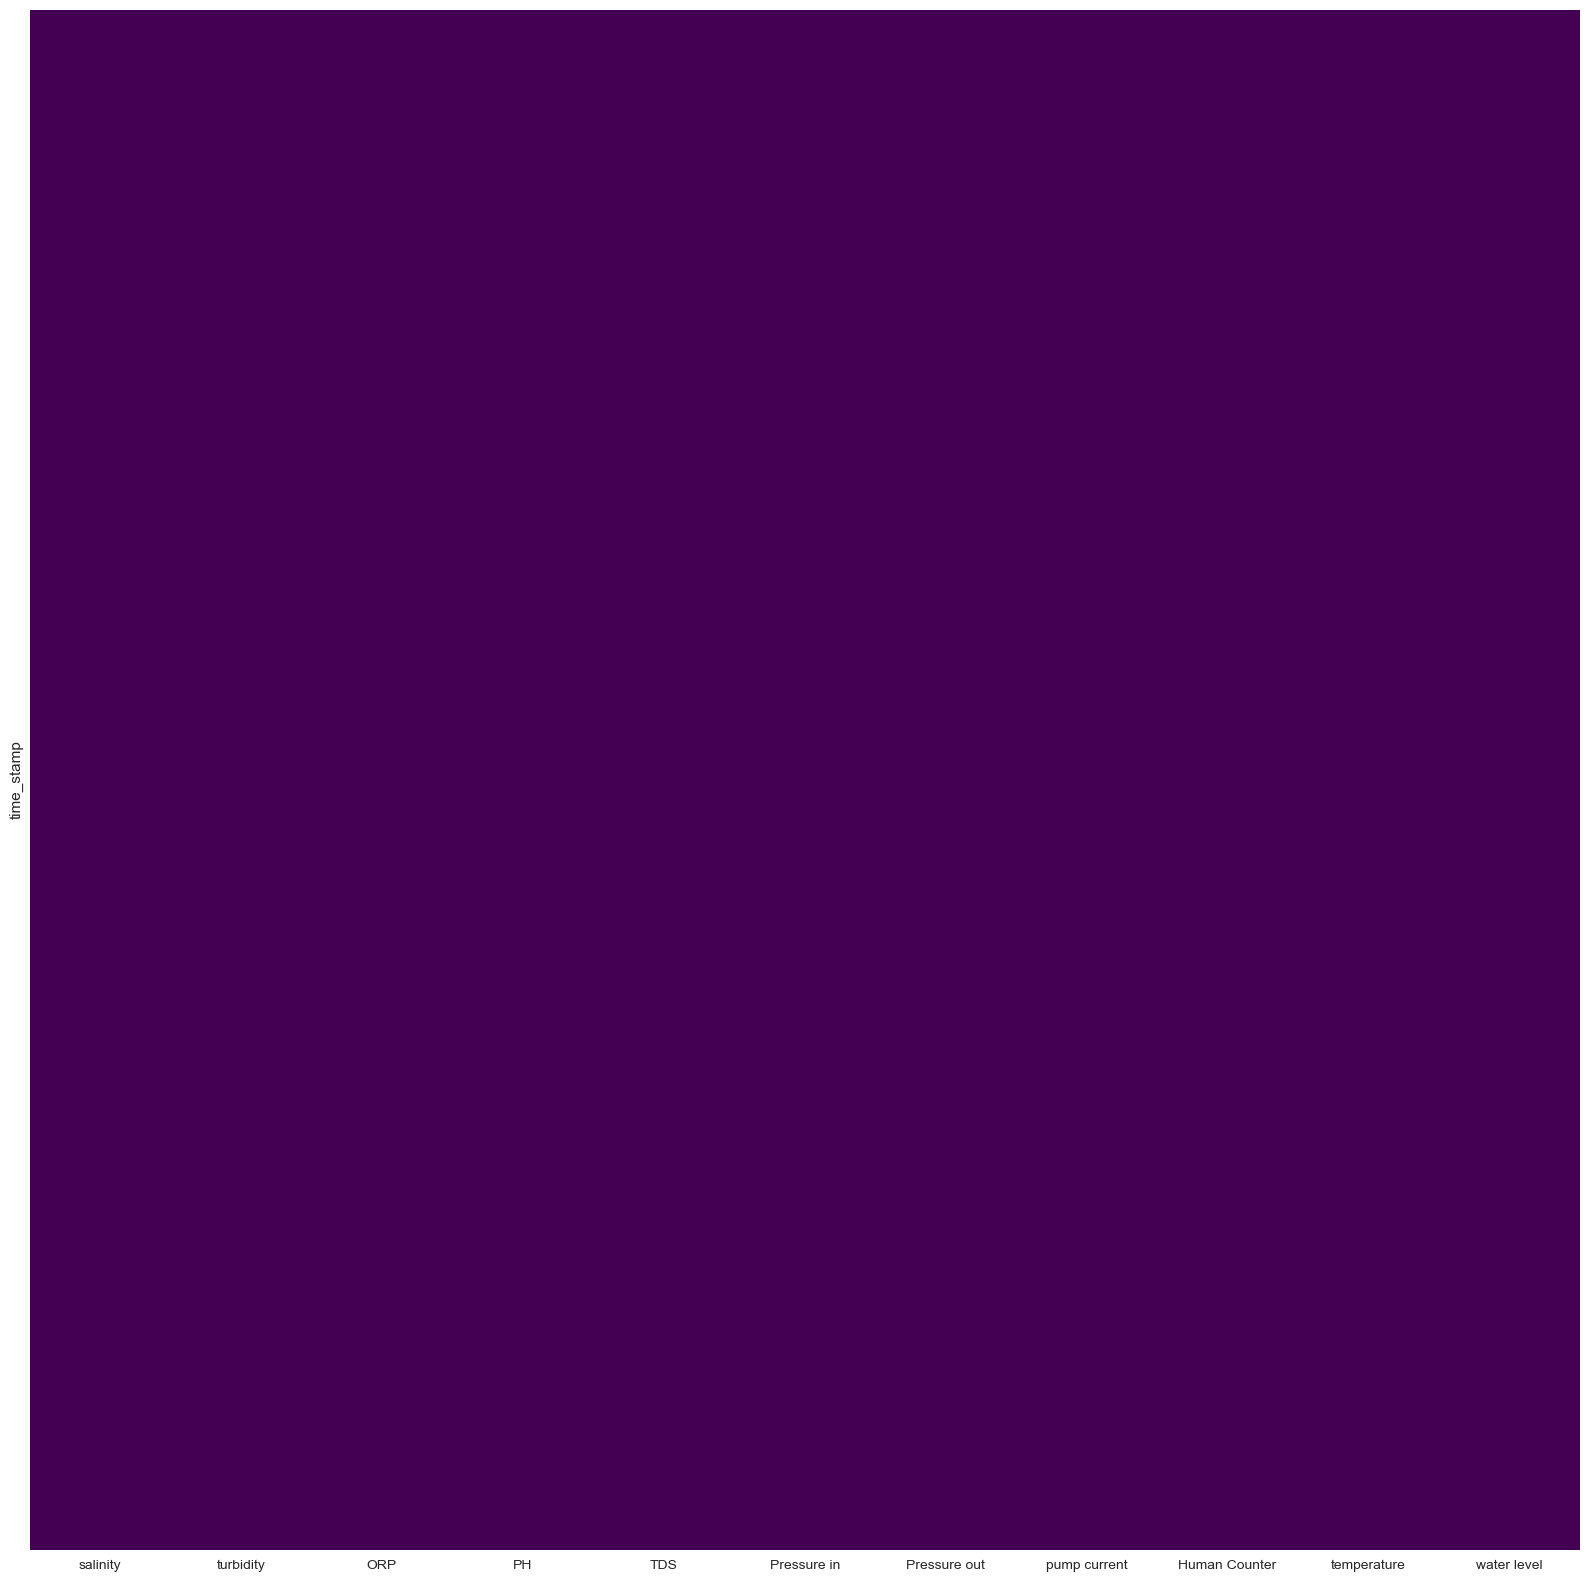

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's do some basic data analysis to get familiar with the data. For instance,
1. Get an idea of statistics on various features.
2. Understand the correlation of various features.
3. Are there any outliers in the dataset? If so, how can be fix this?
4. How to test for multi-collinearity? What features should we eliminate based on this test?

Which of these steps should be run on training data?
When should we split the training data into train validation datasets?

In [14]:
pools_report=pandas_profiling.ProfileReport(df)

In [15]:
pools_report.to_file('pools_report-clean.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# split the data into train and test.
from sklearn.model_selection import train_test_split

In [17]:
# Save some data for later (20%)
train, test = train_test_split(df, test_size=0.2)

In [18]:
# Write to files for convenience
train.to_csv('train_data.csv')
test.to_csv('test_data.csv')

Correlation of response variable with all the other variables. Which feature is most correlated with the response variable? (what is the response variable in this case?)

In [19]:
# Convenient built in pandas method
corr_matrix = train.corr()
corr_matrix['PH'].sort_values(ascending=False)

PH               1.00
ORP              0.69
Pressure out     0.10
pump current     0.09
water level      0.05
temperature      0.02
turbidity       -0.08
Pressure in     -0.08
TDS             -0.17
salinity        -0.17
Human Counter   -0.48
Name: PH, dtype: float64

<AxesSubplot:>

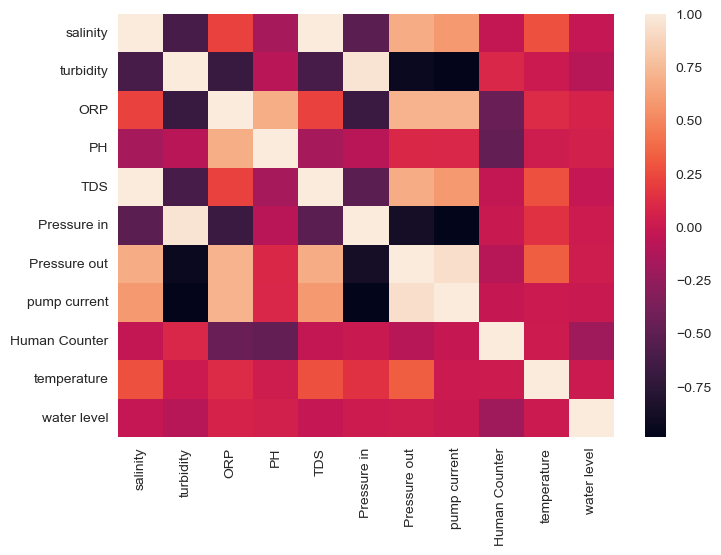

In [20]:
# Plot the map, useful for a high level glance at correlations
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

<Figure size 2000x2000 with 0 Axes>

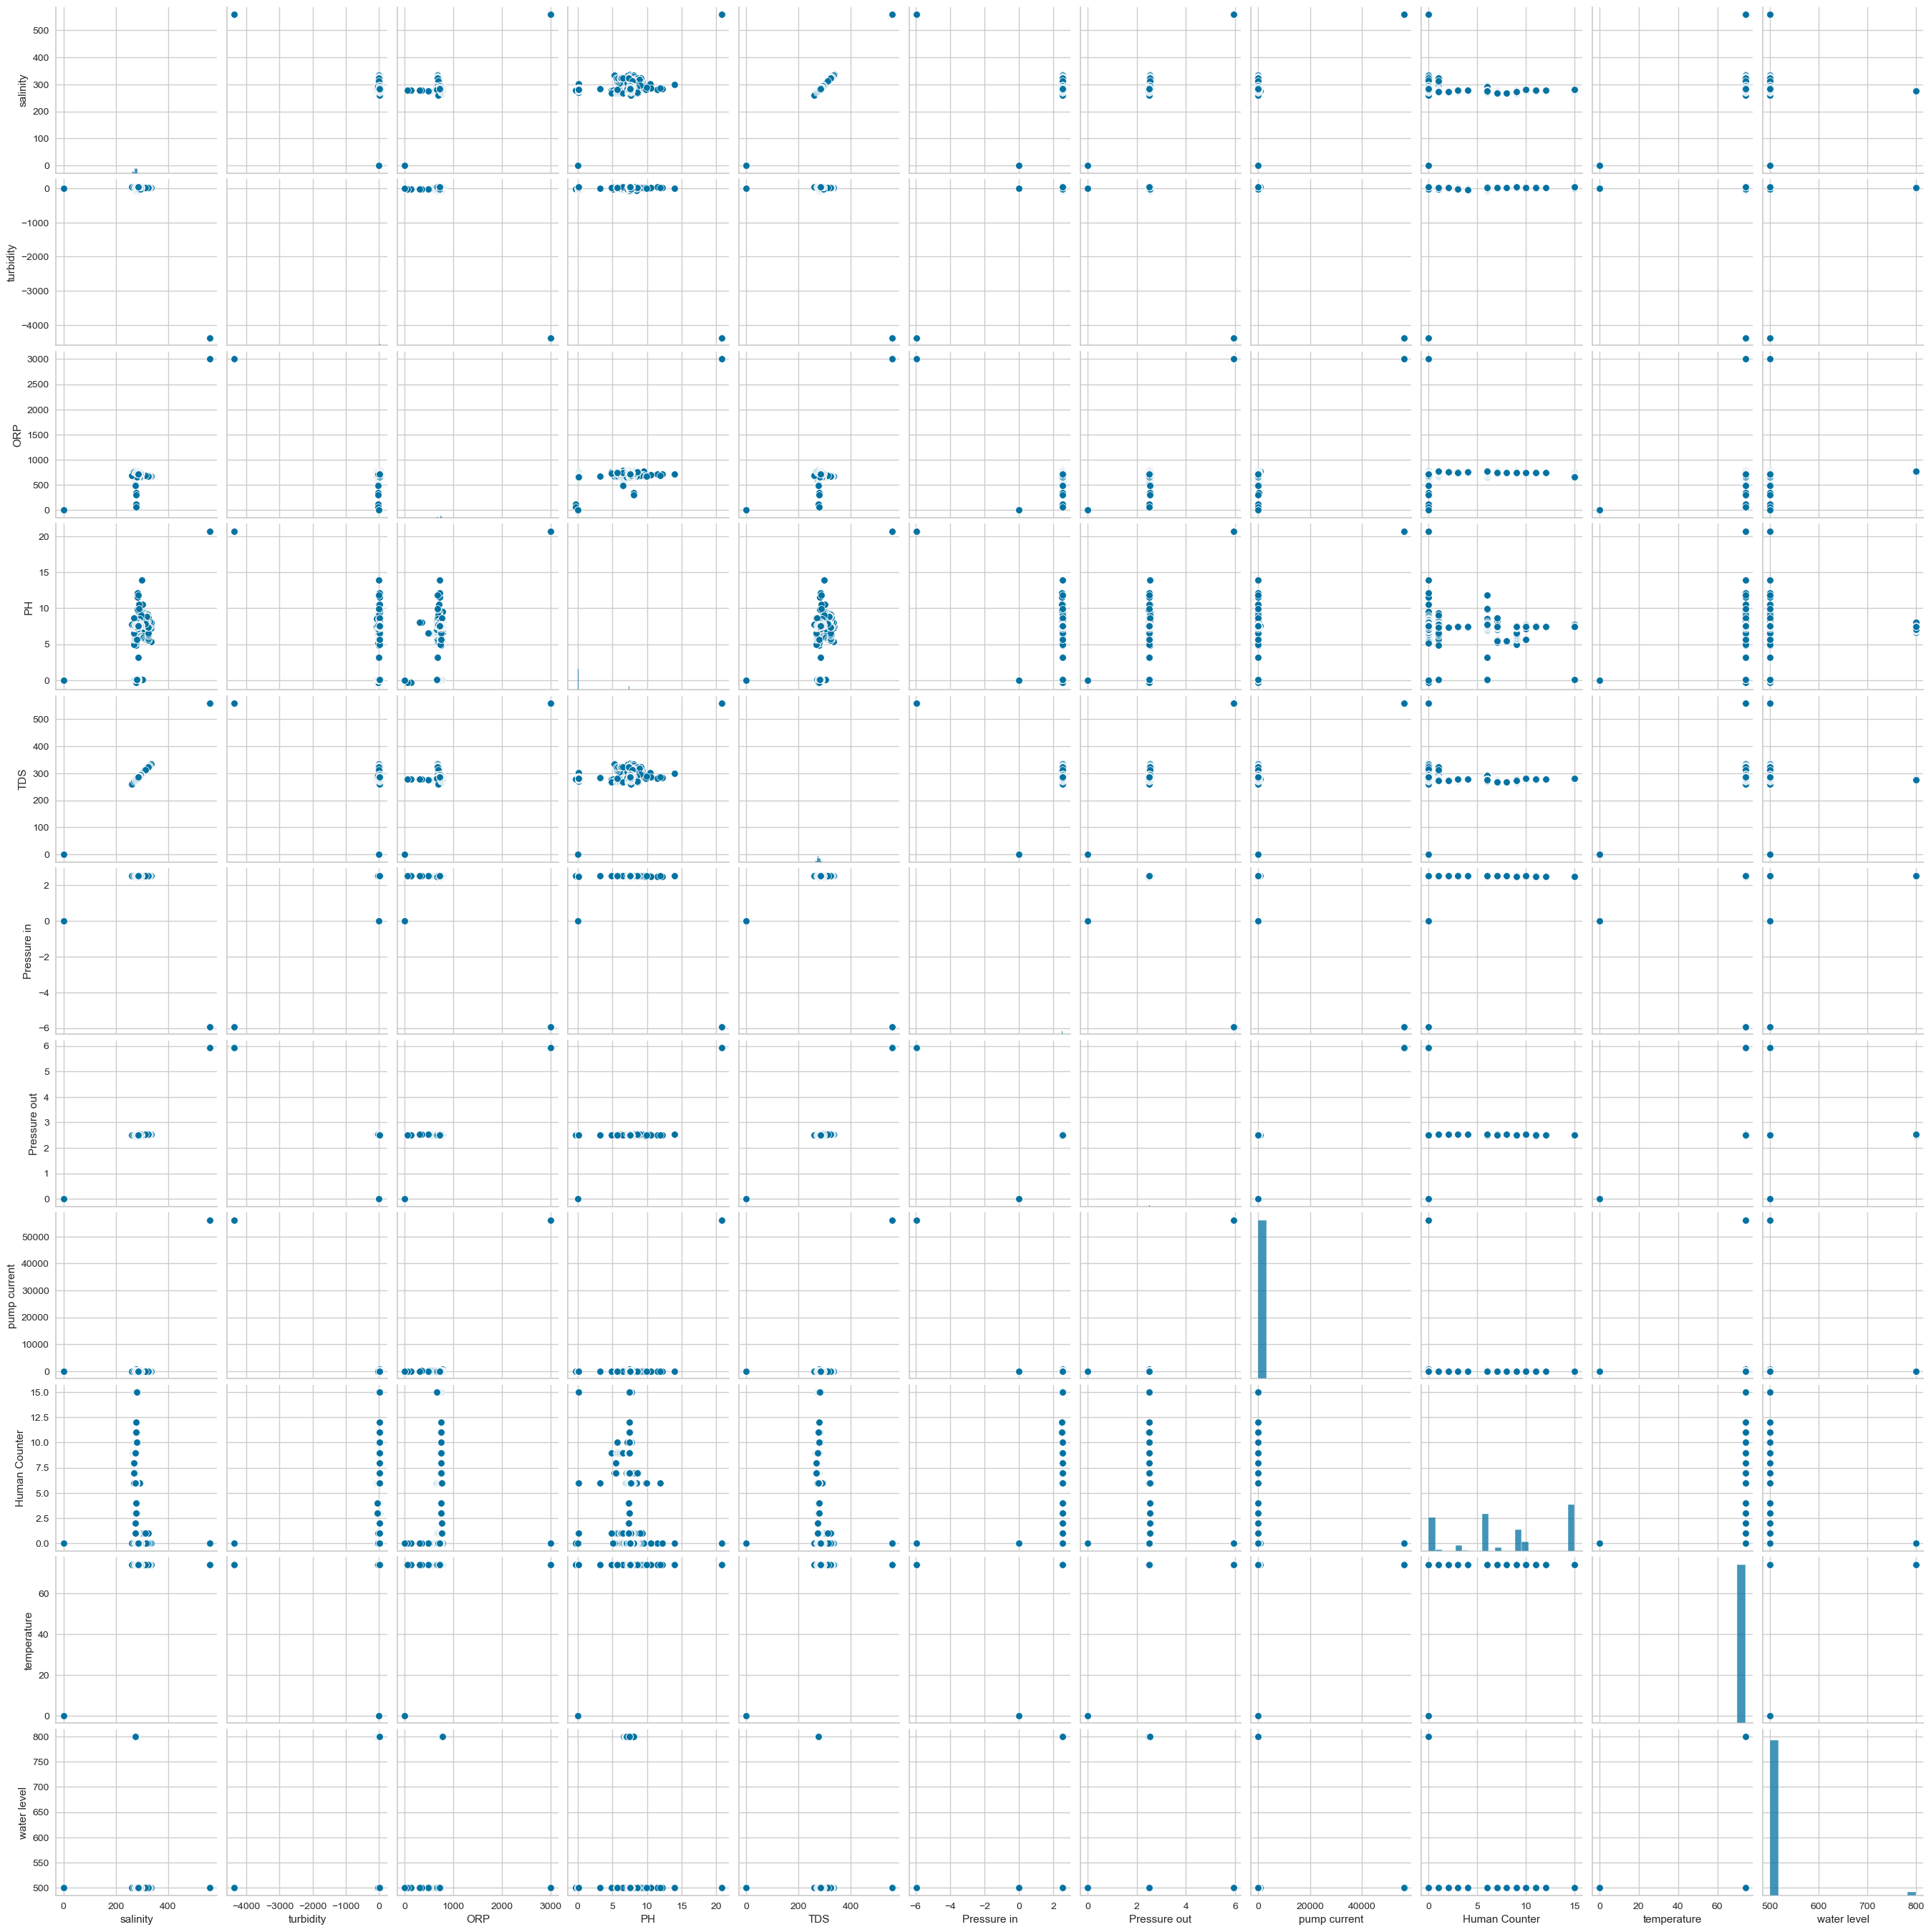

In [21]:
# More in depth look at how variables are plotted together.
plt.figure(figsize=(20,20))
sns.pairplot(df)

<Figure size 2000x2000 with 0 Axes>

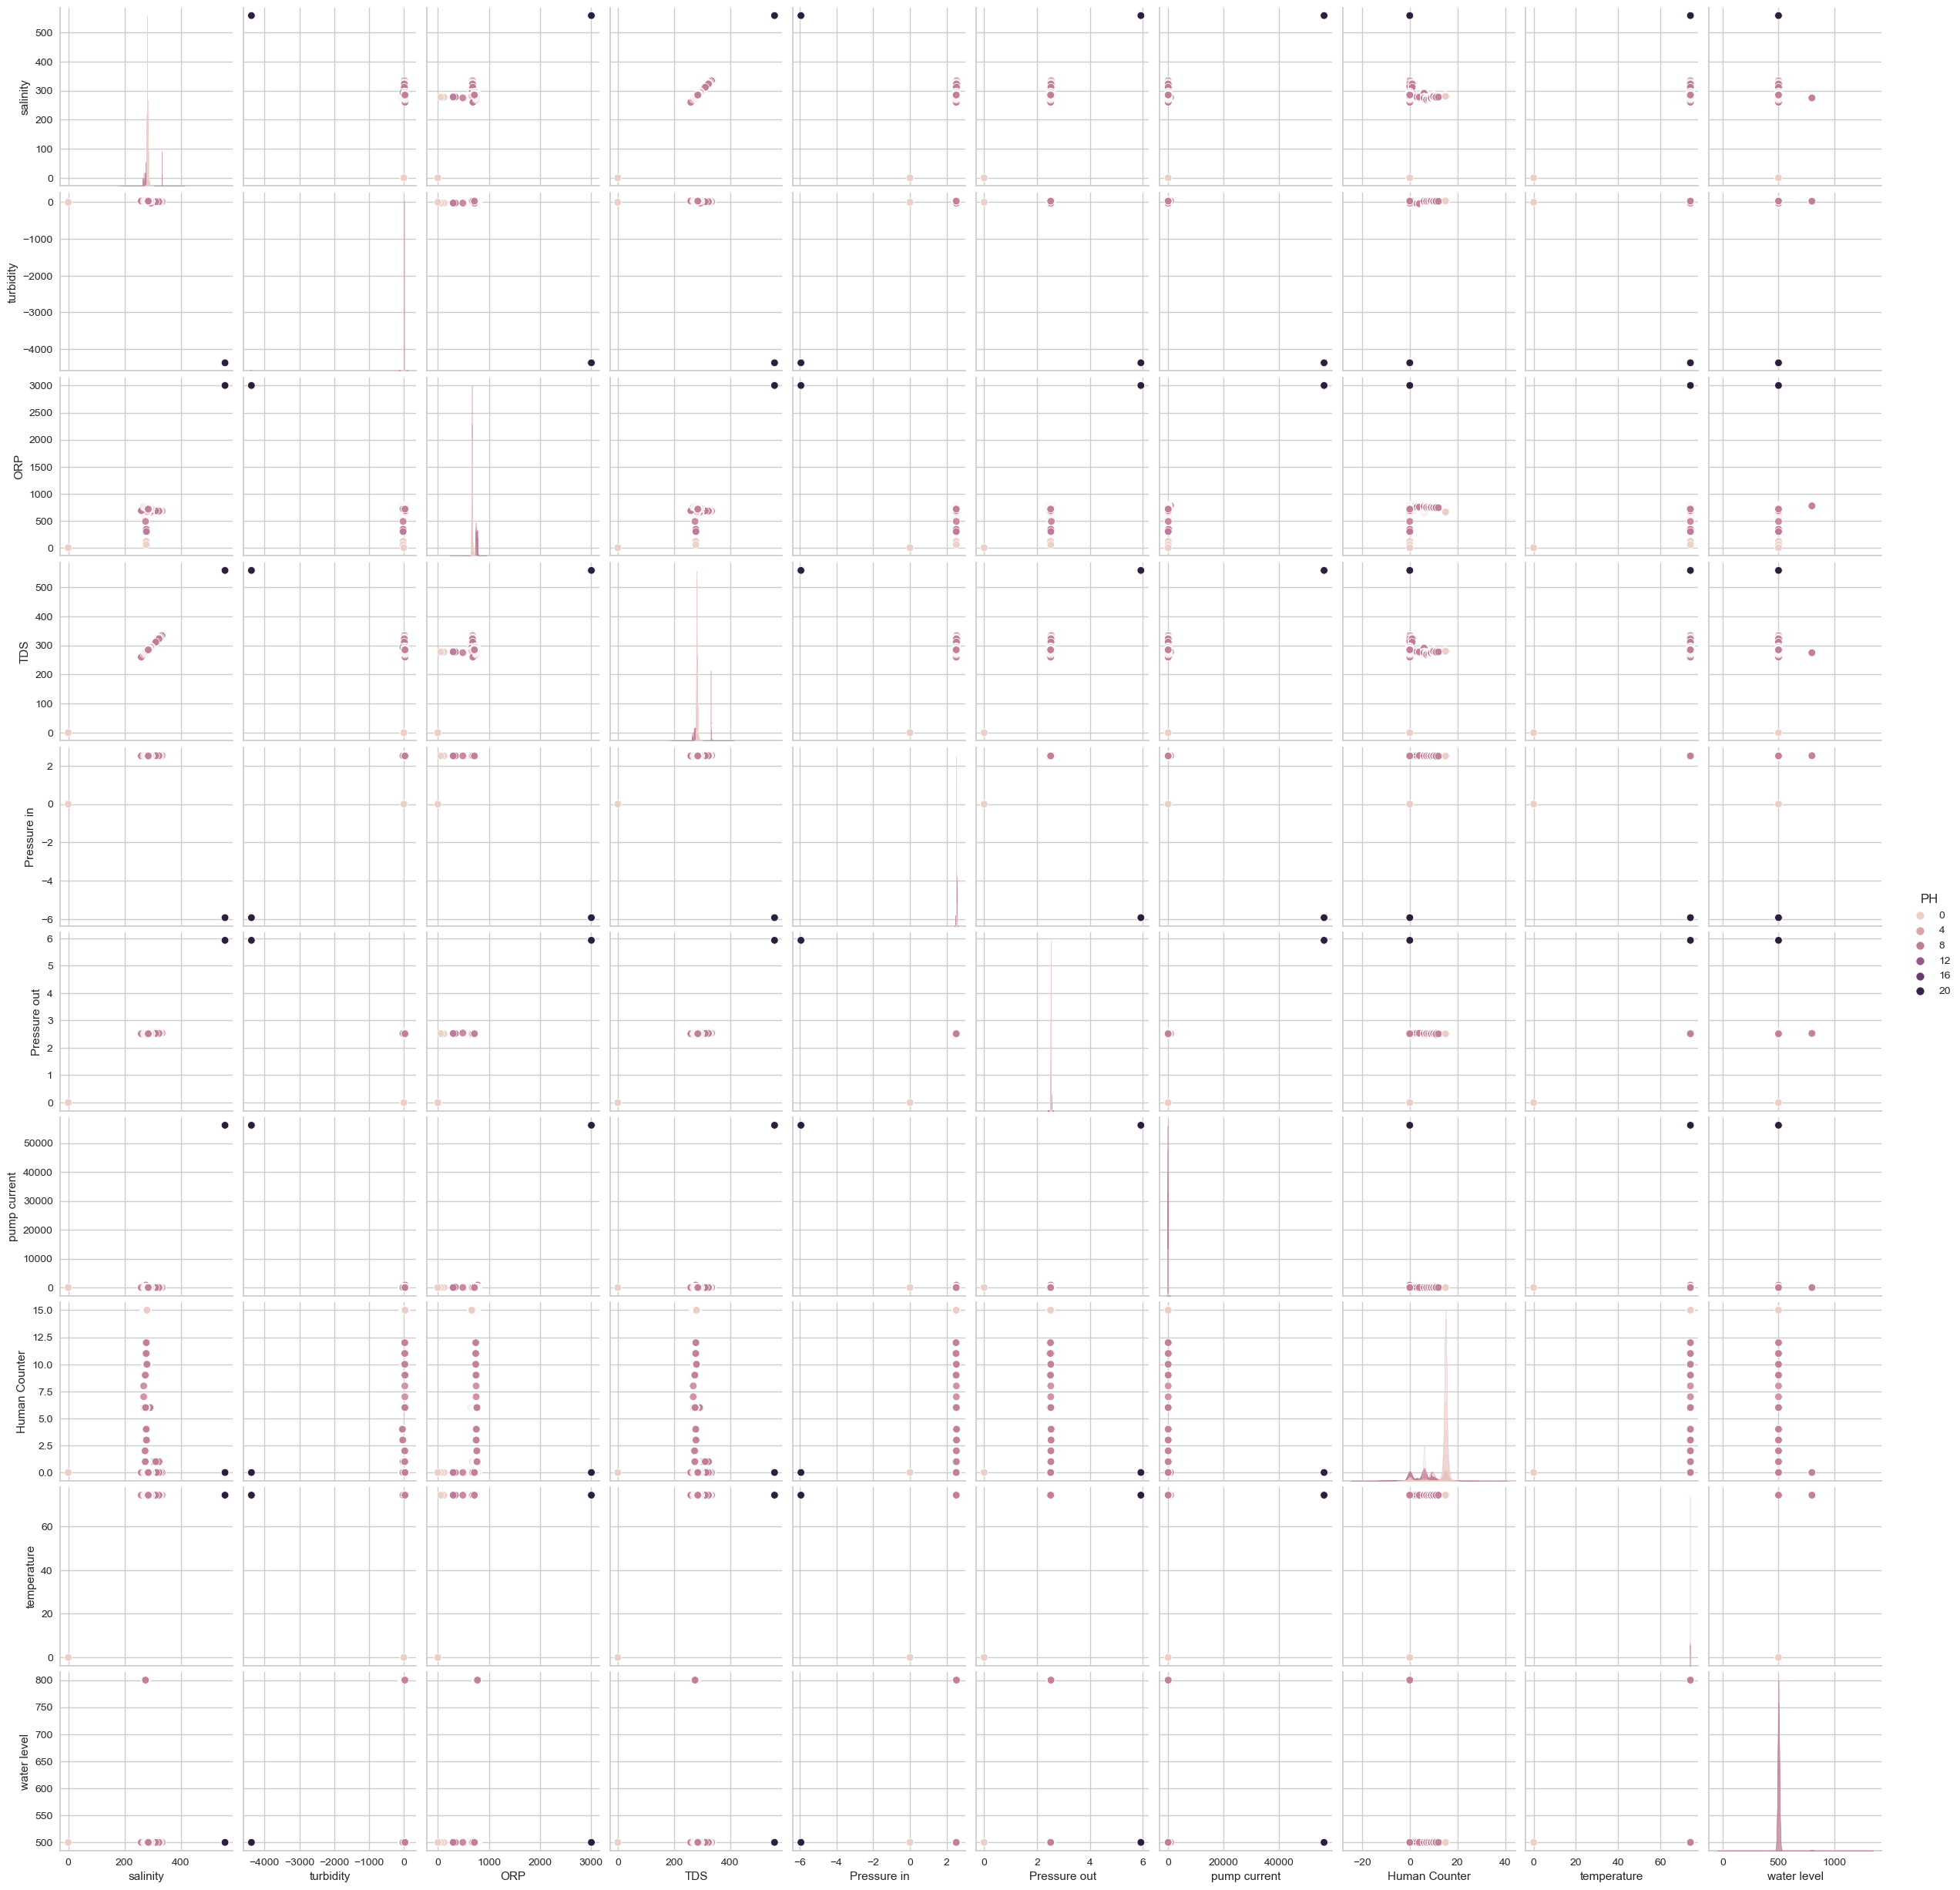

In [23]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue = 'PH')

Test for outliers and remove them. Let's use box plot to find outliers.
A box plot is a visualization aid that presents the lower and upper
quartiles along with lower and upper bounds based on a heuristic.
Drop rows from the training data that are outliers based on the algorithm described [here](https://www.simplypsychology.org/boxplots.html).

Note 1: Removing data is not ideal. Other strategies to deal with outliers
can be data imputation, deep dives on accuracy of measurement among others.

Note 2: Whatever transformations are being applied on the training data
must also be applied on test data. Therefore, the parameters learnt
over training data must be retained for prediction over test data.

In [24]:
# Store the upper & lower bounds based on column name - useful later
upper_bounds = {}
lower_bounds = {}

# Best practice here
train_copy = train.copy()

In [25]:
for c in train_copy.columns:
    # Get the quartiles to base the ranges on
    q25, q75 = np.percentile(train_copy[c], [25, 75])
    intr_qr = q75 - q25

    # Set some bounds - could vary
    upper = q75 + 1.5 * intr_qr
    lower = q25 - 1.5 * intr_qr

    # Store bounds
    upper_bounds[c] = upper
    lower_bounds[c] = lower

    # Logical AND to eliminate all rows whose value is not within bounds for the column we care about
    train = train[(train[c] >= lower) & (train[c] <= upper)].reset_index(drop=True)

In [26]:
# Reassign training data
train = train_copy.copy()

Let's enumerate all the features and the target variable so that
we have a feature matrix (train_X) and a response variable (train_Y).

In [27]:
# Define column names
features = ['ORP', 'Pressure out', 'pump current', 'water level', 'temperature','turbidity','Pressure in','TDS','salinity','Human Counter']
target = ['PH']

In [28]:
# Split X and Y matrices to prepare for model training - useful for next step
train_X = train[features]
train_Y = train[target]

Dealing with multi-collinearity
    A common tool to detect multi-collinearity is variance inflation factor (VIF). VIF of a variable can be computed by regressing the variable againt all other variables and then computing the 1 / (1 - R^2). If this value is larger than 5 (a rule of thumb with no strong theoretical justification) then that variable can be eliminated.
Question: Why correlation matrix is not enough?

In [29]:
def multicollinearity_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF, 5 and 10 are common values
    Note:
        This function changes X inplace. Note: saves on space for large datasets, but you will need to reload the data if you mess up a transformation
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    for i in range(len(X.columns)):

        # Show which columns are left
        print(X.columns)

        # Calculate VIF
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)

        # If it's greater than threshold, eliminate
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break

In [30]:
# Best practice
x_copy = train_X.copy()

In [31]:
# Run our function on the copy
multicollinearity_by_vif(x_copy)

Index(['ORP', 'Pressure out', 'pump current', 'water level', 'temperature',
       'turbidity', 'Pressure in', 'TDS', 'salinity', 'Human Counter'],
      dtype='object')
Removed:  TDS , VIF:  127740129.74747513
Index(['ORP', 'Pressure out', 'pump current', 'water level', 'temperature',
       'turbidity', 'Pressure in', 'salinity', 'Human Counter'],
      dtype='object')
Removed:  Pressure in , VIF:  2070204.1531610708
Index(['ORP', 'Pressure out', 'pump current', 'water level', 'temperature',
       'turbidity', 'salinity', 'Human Counter'],
      dtype='object')
Removed:  Pressure out , VIF:  263158.03370712796
Index(['ORP', 'pump current', 'water level', 'temperature', 'turbidity',
       'salinity', 'Human Counter'],
      dtype='object')
Removed:  temperature , VIF:  6518.77656475672
Index(['ORP', 'pump current', 'water level', 'turbidity', 'salinity',
       'Human Counter'],
      dtype='object')
Removed:  salinity , VIF:  424.87128909510636
Index(['ORP', 'pump current', 'water 

In [35]:
# Remove outliers based on parameters that were set on training data.

# First keep only columns in test that are used for training.
features_used = list(train_X.columns)
features_used.extend(target)
test_copy = test.copy()
test_copy = test_copy[features_used]

In [36]:
# Do the elimination we saw earlier
for c in test_copy.columns:
    test_copy = test_copy[(test_copy[c] >= lower_bounds[c]) & (test_copy[c] <= upper_bounds[c])].reset_index(drop=True)

In [37]:
# Redefine the X and Y matrices
test_X = test_copy[train_X.columns]
test_Y = test_copy[target]

PYCARET

In [44]:
s = setup(train, target='PH')

,Description,Value
0,session_id,3380
1,Target,PH
2,Original Data,"(31709, 11)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(22196, 9)"


In [46]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0194,0.0415,0.1933,0.9944,0.0526,0.0490,0.2400
dt,Decision Tree Regressor,0.0251,0.1041,0.3083,0.9860,0.0757,0.0619,0.0170
rf,Random Forest Regressor,0.0255,0.0712,0.2543,0.9905,0.0671,0.0675,0.3870
xgboost,Extreme Gradient Boosting,0.0257,0.0669,0.2477,0.9910,0.0663,0.0685,0.1040
knn,K Neighbors Regressor,0.0282,0.0951,0.2967,0.9872,0.0752,0.0578,0.0430
lightgbm,Light Gradient Boosting Machine,0.0454,0.0975,0.3051,0.9870,0.0818,0.1245,0.0190
gbr,Gradient Boosting Regressor,0.0522,0.1052,0.3151,0.9859,0.0836,0.1321,0.1470
ada,AdaBoost Regressor,0.1999,0.2423,0.4767,0.9673,0.1668,0.7164,0.0460
ridge,Ridge Regression,0.6131,1.2660,1.1072,0.8307,0.3059,1.8162,0.0060
br,Bayesian Ridge,0.6244,1.2644,1.1064,0.8309,0.3024,1.7888,0.0070
